# <a style='color:blue'>Anticipez les besoins en consommation de bâtiments (Notebook 1)

- <a href="#C0">Introduction</a>


- <a href="#C1">1: Nettoyage du jeu de données</a>
    - <a href="#C11">1.1 Importation du jeu de données</a>
    - <a href="#C12">1.2 Qualité du jeu de données - valeurs manquantes</a>
    - <a href="#C13">1.3 Nettoyage des lignes</a>
        - <a href="#C131">1.3.1 BuildingType</a>
        - <a href="#C132">1.3.2 ComplianceStatus</a>
        - <a href="#C133">1.3.3 Outlier</a>
        - <a href="#C134">1.3.4 DefaultData</a>
        - <a href="#C135">1.3.5 Valeurs manquantes pour les 2 targets</a>
        - <a href="#C136">1.3.6 Doublons</a>
    - <a href="#C14">1.4 Nettoyage des colonnes</a>
        - <a href="#C141">1.4.1 Nettoyage des colonnes vides (remplissage < 50%)</a>
        - <a href="#C142">1.4.2 Nettoyage des colonnes en doublon</a>
        - <a href="#C143">1.4.3 Nettoyage des colonnes - Approche métier</a>    
    - <a href="#C15">1.5 Traitement des valeurs aberrantes</a>
    - <a href="#C16">1.6 Validation des données nettoyées</a>

    
- <a href="#C2">2: Analyse exploratoire du jeu de données</a>
    - <a href="#C21">2.1 Analyse univariée</a>
        - <a href="#C211">2.11 Variables quantitatives - Histogrammes</a>
        - <a href="#C212">2.1.2 Variables quantitatives - Boxplot</a>
        - <a href="#C213">2.1.3 Variable catégorielle - Pie</a>
    - <a href="#C22">2.2: Analyse bivariée - Heatmap de corrélation</a>

    
- <a href="#C3">3: Features engineering</a>
    - <a href="#C31">3.1 Transformation des variables catégorielles</a>
    - <a href="#C32">3.2 Transformation de variables quantitatives en intervalles</a>
    - <a href="#C33">3.3 Transformation des variables quantitatives continues en binaires</a>    
    - <a href="#C34">3.4 Transformation des variables quantitatives en un ratio</a>
    - <a href="#C35">3.5 Passage au log</a>

# <a name="C0">Introduction</a>

La ville de Seattle a pour objectif d'atteindre la neutralité carbone en 2050.
Pour ce faire, notre équipe s'intéresse aux consommations et aux émissions des bâtiments non destinés à l’habitation.
A partir de relevés de 2016, nous allons tenter de prédire les émissions de CO2 et la consommation totale d’énergie de ce type de batiments, en testant différents modèles de prédiction.
Au préalable, un nettoyage et une analyse exploratoire sont nécessaires.

# <a name="C1">Partie 1: Nettoyage du jeu de données</a>

# <a name="C11">1.1: Importation du jeu de données</a>

Importation des librairies Numpy, Pandas, Pyplot, Missingno et du jeu de données

In [614]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
buildings=pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [615]:
buildings.shape

(3376, 46)

Le dataframe buildings contient 3376 lignes et 46 colonnes

# <a name="C12">1.2 Qualité du jeu de données - valeurs manquantes</a>

Visualisation des valeurs manquantes du dataframe buildings avec **Missingno**

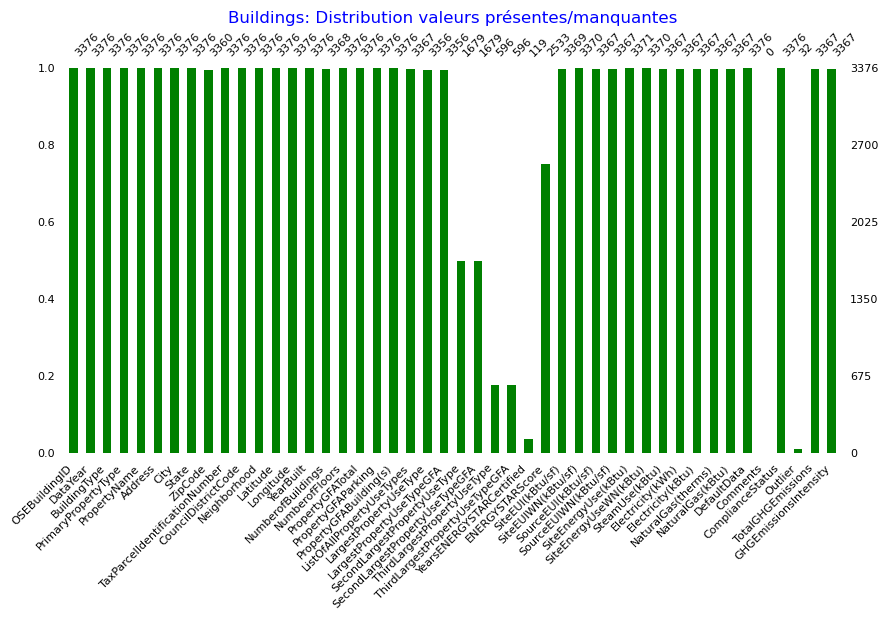

In [616]:
fig, ax = plt.subplots(figsize=(10,5))
msno.bar(buildings, color="green", ax=ax, fontsize=8)
ax.set_title("Buildings: Distribution valeurs présentes/manquantes")
ax.title.set_color('blue')
ax.title.set_size(12)
plt.show()

In [617]:
taux_de_remplissage = round((1 - (buildings.isnull().sum().sum() / (buildings.shape[0] * buildings.shape[1]))) * 100, 2)
print("Taux de remplissage:",taux_de_remplissage,"%")

Taux de remplissage: 87.15 %


# <a name="C13">1.3 Nettoyage des lignes</a>

Servons-nous des 4 variables suivantes pour effectuer un nettoyage des lignes:

- BuildingType

- ComplianceStatus

- Outlier

- DefaultData

# <a name="C131">1.3.1 BuildingType</a>

Gardons uniquement les bâtiments non destinés à l’habitation

In [618]:
buildings['BuildingType'].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [619]:
buildings=buildings.loc[buildings['BuildingType'] =='NonResidential',:]
buildings.shape

(1460, 46)

Suppression du batiment de catégorie 'Low-Rise Multifamily' car non ne gardons que les batiments non-résidentiels

In [620]:
buildings.drop(buildings[buildings['PrimaryPropertyType'] == 'Low-Rise Multifamily'].index, inplace=True)

# <a name="C132">1.3.2 ComplianceStatus</a>

Gardons uniquement les bâtiments qui ont un ComplianceStatus=Compliant

In [621]:
buildings['ComplianceStatus'].value_counts()

Compliant                       1431
Non-Compliant                     16
Error - Correct Default Data      10
Missing Data                       1
Name: ComplianceStatus, dtype: int64

In [622]:
buildings=buildings.loc[buildings['ComplianceStatus'] =='Compliant',:]
buildings.shape

(1431, 46)

# <a name="C133">1.3.3 Outlier</a>

Supprimons les bâtiments qui ont la variable 'Outlier' non nulle

In [623]:
buildings.loc[buildings['Outlier'].notnull(),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


Tous les bâtiments avec une valeur de Outlier non nulle ont déjà été supprimés.

# <a name="C134">1.3.4 DefaultData</a>

Supprimons les bâtiments pour lesquels au moins un paramètre par défault a été utilisé.

In [624]:
buildings['DefaultData'].value_counts()

False    1431
Name: DefaultData, dtype: int64

Tous les bâtiments avec 1 paramètre par défault ont déjà été supprimés.

# <a name="C135">1.3.5 Valeurs manquantes pour les 2 targets</a>

Nous voulons tenter de prédire:

    - target1: la consommation totale d’énergie => variable SiteEnergyUseWN(kBtu)
    
    - target2: les émissions de CO2=> variable TotalGHGEmissions

In [625]:
# Recherche des valeurs manquantes pour target 1
buildings.loc[buildings['SiteEnergyUseWN(kBtu)'].isnull(),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
563,757,2016,NonResidential,Large Office,Market Place I & II-2003 Western Avenue,2003 Western Avenue,Seattle,WA,98121.0,1977200280,...,1427645.25,4871126.0,14160.40918,1416041.0,False,NaN,Compliant,NaN,109.16,0.83


In [626]:
# Remplacement de la valeur manquante par la somme des consommations de gaz, d'éléctricity et de vapeur:
buildings.loc[buildings['OSEBuildingID']==757,'SiteEnergyUseWN(kBtu)']=buildings.loc[buildings['SiteEnergyUseWN(kBtu)'].isnull(),'Electricity(kBtu)'] + buildings.loc[buildings['SiteEnergyUseWN(kBtu)'].isnull(),'NaturalGas(kBtu)'] + buildings.loc[buildings['SiteEnergyUseWN(kBtu)'].isnull(),'SteamUse(kBtu)']

In [627]:
# Recherche des valeurs manquantes pour target 2
buildings.loc[buildings['TotalGHGEmissions'].isnull(),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


# <a name="C136">1.3.6 Doublons</a>

Vérifions s'il existe des doublons au sein de la variable 'OSEBuildingID'.

In [628]:
buildings['OSEBuildingID'].duplicated().sum() 

0

# <a name="C14">1.4 Nettoyage des colonnes</a>

# <a name="C141">1.4.1 Nettoyage colonnes vides (remplissage < 50%)</a>

Supprimons les colonnes qui comptent plus de 50% de valeurs manquantes:

In [629]:
buildings.dropna(axis=1,thresh=buildings.shape[0]*0.5,inplace=True)   #Suppression des variables (colonnes) qui ont plus de 50% de valeurs manquantes. axix=1 (pour supprimer les colonnes)
buildings.shape

(1431, 41)

# <a name="C142">1.4.2 Nettoyage colonnes en doublon</a>

Certaines paires de colonnes, bien que n'ayant pas exactement le même nom, apportent la même information (mais dans un format différent). Considérons ces paires de colonnes comme des doublons:

- SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf) => on garde SiteEUIWN(kBtu/sf) car weather Normalised
- SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf) => on garde SourceEUIWN(kBtu/sf)
- SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu) => on garde SiteEnergyUseWN(kBtu)
- Electricity(kWh), Electricity(kBtu) => on garde Electricity(kBtu)
- NaturalGas(therms), NaturalGas(kBtu) => on garde NaturalGas(kBtu)
- TotalGHGEmissions, GHGEmissionsIntensity => on garde TotalGHGEmissions (on ne souhaite pas diviser par la surface)


In [630]:
buildings=buildings.drop(columns=['SiteEUI(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUse(kBtu)','Electricity(kWh)','NaturalGas(therms)','GHGEmissionsIntensity'])
buildings.shape

(1431, 35)

# <a name="C143">1.4.3 Nettoyage colonnes - approche métier</a>

Gardons uniquement les colonnes qui sont pertinentes pour effectuer les prédictions de consommation d'energie et d'émission de CO2.

- Adresse: nous ne pourrons pas effectuer de prédiction à partir des adresses. Gardons uniquement la variable Neighborhood et supprimons 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
- DataYear: tous les relevés ont été effectués en 2016, cette variable n'apporte aucune information supplémentaire et peut etre supprimée
- ListOfAllPropertyUseTypes: trop complexe
- SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA': à supprimer
- 'LargestPropertyUseType' et 'LargestPropertyUseTypeGFA': à supprimer car trop de catégorie et semblable à PrimaryPropertyType et PropertyGFATotal
- Les 4 variables qui ont servi au nettoyage des lignes peuvent être supprimées
- 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)': à supprimer car on a déjà 'SiteEnergyUseWN(kBtu)'

In [631]:
buildings=buildings.drop(columns=['Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Latitude', 'Longitude','DataYear','ListOfAllPropertyUseTypes','LargestPropertyUseType','BuildingType','DefaultData','ComplianceStatus','SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','LargestPropertyUseTypeGFA'])
buildings.shape

(1431, 16)

# <a name="C15">1.5 Traitement des valeurs aberrantes</a>

Affichons le min et le max de chaque variable quantitative avec un describe.

In [632]:
buildings.describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,1431.000000,1431.000000,1431.000000,1431.000000,1.431000e+03,1431.000000,1.431000e+03,975.000000,1.431000e+03,1.431000e+03,1.431000e+03,1.431000e+03,1431.000000
mean,16084.131377,1961.114605,1.032145,4.403215,1.132782e+05,14459.036338,9.881914e+04,63.512821,7.917881e+06,5.087378e+05,5.557927e+06,1.710246e+06,168.846164
std,13387.053120,32.860855,0.535796,6.823568,1.910167e+05,44787.252244,1.668578e+05,28.788680,1.938337e+07,5.499376e+06,1.335855e+07,5.695133e+06,591.229948
min,1.000000,1900.000000,0.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,1.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000
25%,606.500000,1929.000000,1.000000,1.000000,2.936000e+04,0.000000,2.830400e+04,44.000000,1.293010e+06,0.000000e+00,7.199750e+05,0.000000e+00,19.750000
50%,21129.000000,1965.000000,1.000000,3.000000,4.811200e+04,0.000000,4.605900e+04,70.000000,2.769792e+06,0.000000e+00,1.705793e+06,4.439880e+05,48.350000
75%,24571.000000,1988.000000,1.000000,5.000000,1.049235e+05,0.000000,9.443500e+04,88.000000,7.192840e+06,0.000000e+00,5.152340e+06,1.402106e+06,134.630000
max,50094.000000,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,100.000000,2.966717e+08,1.349435e+08,2.745325e+08,1.381912e+08,12307.160000


Les variables Electricity(kBtu) et TotalGHGEmissions ont des min négatifs, ce qui est aberrant. 

Détection des buildings concernés

In [633]:
buildings[buildings['Electricity(kBtu)'] < 0]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3206,49784,Small- and Mid-Sized Office,Bullitt Center,CENTRAL,2013,1.0,6,52000,0,52000,100.0,240132.0938,0.0,-115417.0,0.0,-0.8


In [634]:
buildings[buildings['TotalGHGEmissions']<0]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
3206,49784,Small- and Mid-Sized Office,Bullitt Center,CENTRAL,2013,1.0,6,52000,0,52000,100.0,240132.0938,0.0,-115417.0,0.0,-0.8


Suppression de cette ligne qui contient plusieurs valeurs aberrantes

In [635]:
buildings.drop(buildings[buildings['Electricity(kBtu)']<0].index, inplace=True)

In [636]:
buildings[buildings['SiteEnergyUseWN(kBtu)']==0]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
220,343,Large Office,Norton Building,DOWNTOWN,1958,1.0,17,378525,84600,293925,69.0,0.0,10921066.00,13985064.0,0.0,940.47
247,372,Large Office,Metropolitan Park East,DOWNTOWN,1988,1.0,20,497513,118744,378769,65.0,0.0,0.00,26602310.0,220905.0,197.19
284,414,Large Office,Onni 1411 Fourth Development LP,DOWNTOWN,1929,1.0,15,151039,0,151039,84.0,0.0,2850077.75,2596546.0,0.0,238.09
350,493,Small- and Mid-Sized Office,200 First Ave W,MAGNOLIA / QUEEN ANNE,1971,1.0,5,88000,21600,66400,75.0,0.0,0.00,3484915.0,0.0,24.29
882,20130,Worship Facility,Green Lake United Methodist Church,Northwest,1910,1.0,2,23931,0,23931,88.0,0.0,0.00,167075.0,329402.0,18.66
953,20324,Worship Facility,Temple Beth Am,NORTHEAST,2000,1.0,2,31386,0,31386,52.0,0.0,0.00,710478.0,417701.0,27.14
3275,49968,University,Aerospace,NORTHEAST,1969,1.0,4,58779,0,58779,NaN,0.0,0.00,3719217.0,0.0,25.93
3277,49972,University,Computer Science and Electrical Engineering,NORTHEAST,1998,1.0,6,203030,0,203030,NaN,0.0,0.00,28614613.0,0.0,199.48


Suppression des lignes qui contiennent SiteEnergyUseWN(kBtu)=0

In [637]:
buildings.drop(buildings[buildings['SiteEnergyUseWN(kBtu)']==0].index, inplace=True)

In [638]:
buildings[buildings['TotalGHGEmissions']==0]

,OSEBuildingID,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
513,700,Supermarket / Grocery Store,IUC- Whole Foods Interbay,MAGNOLIA / QUEEN ANNE,2008,1.0,1,57176,0,57176,31.0,12843856.0,0.0,0.0,0.0,0.0


Suppression de la ligne qui contient TotalGHGEmissions=0

In [639]:
buildings.drop(buildings[buildings['TotalGHGEmissions']==0].index, inplace=True)

In [640]:
buildings.describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000,1.421000e+03,967.000000,1.421000e+03,1.421000e+03,1.421000e+03,1.421000e+03,1421.000000
mean,16061.852217,1961.021112,1.032372,4.379310,1.129906e+05,14402.489092,9.858815e+04,63.455016,7.964394e+06,5.026268e+05,5.540907e+06,1.721600e+06,168.858839
std,13310.687887,32.844634,0.537673,6.819532,1.912232e+05,44808.827068,1.671352e+05,28.841176,1.944086e+07,5.511299e+06,1.337453e+07,5.713521e+06,592.866865
min,1.000000,1900.000000,0.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,1.000000,5.811420e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.400000
25%,609.000000,1929.000000,1.000000,1.000000,2.921400e+04,0.000000,2.829600e+04,43.500000,1.310237e+06,0.000000e+00,7.209450e+05,0.000000e+00,19.770000
50%,21138.000000,1965.000000,1.000000,3.000000,4.800100e+04,0.000000,4.596000e+04,70.000000,2.789899e+06,0.000000e+00,1.705403e+06,4.586400e+05,48.500000
75%,24563.000000,1988.000000,1.000000,5.000000,1.043520e+05,0.000000,9.400200e+04,88.000000,7.250730e+06,0.000000e+00,5.135039e+06,1.410803e+06,134.380000
max,50094.000000,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,100.000000,2.966717e+08,1.349435e+08,2.745325e+08,1.381912e+08,12307.160000


# <a name="C16">1.6 Validation des données nettoyées</a>

Affichons le minimum et le maximum de chaque variable quantitative avec un describe

In [641]:
buildings.describe()

,OSEBuildingID,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
count,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03,1421.000000,1.421000e+03,967.000000,1.421000e+03,1.421000e+03,1.421000e+03,1.421000e+03,1421.000000
mean,16061.852217,1961.021112,1.032372,4.379310,1.129906e+05,14402.489092,9.858815e+04,63.455016,7.964394e+06,5.026268e+05,5.540907e+06,1.721600e+06,168.858839
std,13310.687887,32.844634,0.537673,6.819532,1.912232e+05,44808.827068,1.671352e+05,28.841176,1.944086e+07,5.511299e+06,1.337453e+07,5.713521e+06,592.866865
min,1.000000,1900.000000,0.000000,0.000000,1.630000e+04,0.000000,3.636000e+03,1.000000,5.811420e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.400000
25%,609.000000,1929.000000,1.000000,1.000000,2.921400e+04,0.000000,2.829600e+04,43.500000,1.310237e+06,0.000000e+00,7.209450e+05,0.000000e+00,19.770000
50%,21138.000000,1965.000000,1.000000,3.000000,4.800100e+04,0.000000,4.596000e+04,70.000000,2.789899e+06,0.000000e+00,1.705403e+06,4.586400e+05,48.500000
75%,24563.000000,1988.000000,1.000000,5.000000,1.043520e+05,0.000000,9.400200e+04,88.000000,7.250730e+06,0.000000e+00,5.135039e+06,1.410803e+06,134.380000
max,50094.000000,2015.000000,9.000000,99.000000,1.952220e+06,512608.000000,1.765970e+06,100.000000,2.966717e+08,1.349435e+08,2.745325e+08,1.381912e+08,12307.160000


Après nettoyage des valeurs aberrantes, les valeurs min et max des variables quantitatives sont cohérentes.

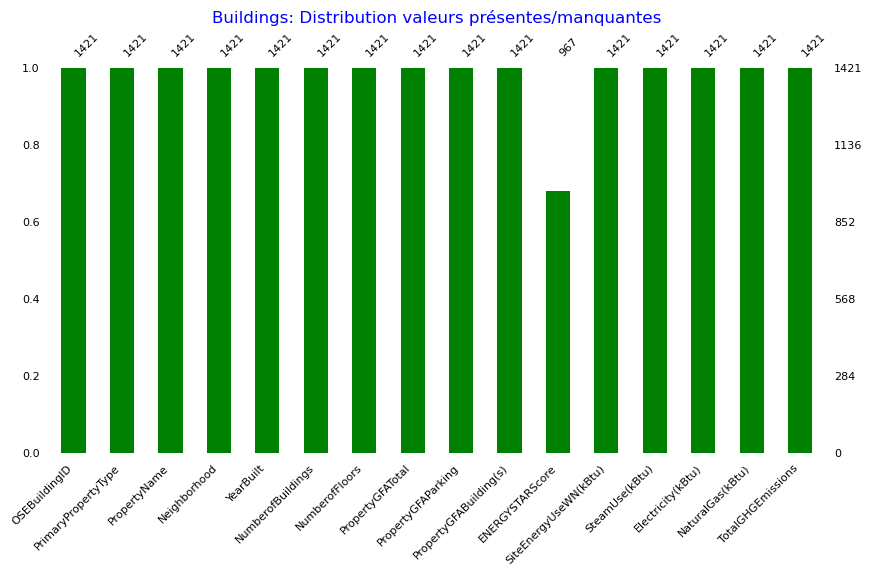

In [642]:
fig, ax = plt.subplots(figsize=(10,5))
msno.bar(buildings, color="green", ax=ax, fontsize=8)
ax.set_title("Buildings: Distribution valeurs présentes/manquantes")
ax.title.set_color('blue')
ax.title.set_size(12)
plt.show()

In [643]:
buildings.to_csv('buildings_after_cleaning.csv', index=False)

# <a name="C2">Partie 2: Analyse exploratoire</a>

# <a name="C21">2.1: Analyse univariée</a>

# <a name="C211">2.1.1 Variables quantitatives - Histogrammes</a>

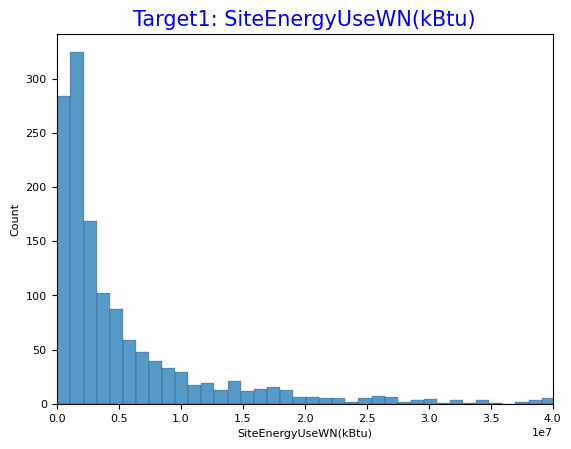

In [644]:
sns.histplot(data=buildings, x='SiteEnergyUseWN(kBtu)')
plt.xlim(0, 40000000)
plt.title('Target1: SiteEnergyUseWN(kBtu)', fontsize=15, color="blue")
plt.show()

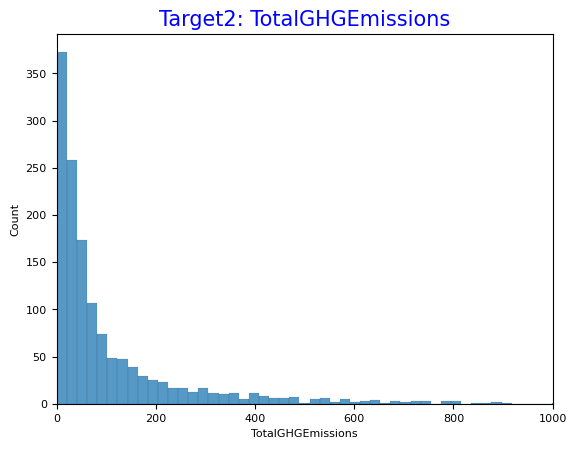

In [645]:
sns.histplot(data=buildings, x='TotalGHGEmissions')
plt.xlim(0, 1000)
plt.title('Target2: TotalGHGEmissions', fontsize=15, color="blue")
plt.show()

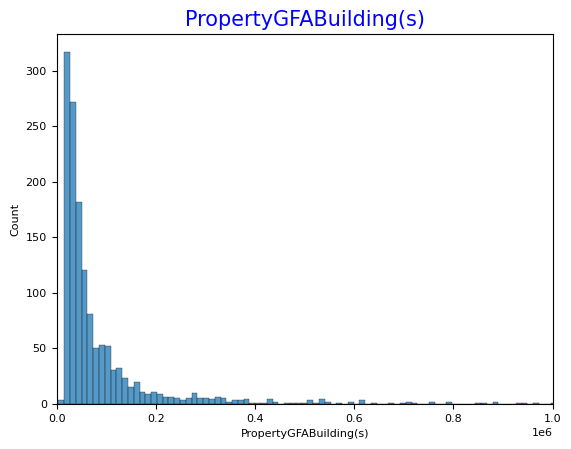

In [646]:
sns.histplot(data=buildings, x='PropertyGFABuilding(s)')
plt.xlim(0, 1000000)
plt.title('PropertyGFABuilding(s)', fontsize=15, color="blue")
plt.show()

Pour ces 3 variables, la distribution est unimodale. 

Un passage au log de ces variables est préférable afin d'améliorer les performances des modèles que nous entrainerons. 

# <a name="C212">2.1.2 Variables quantitatives - Boxplot</a>

In [647]:
buildings_energy=buildings.loc[:,['SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]

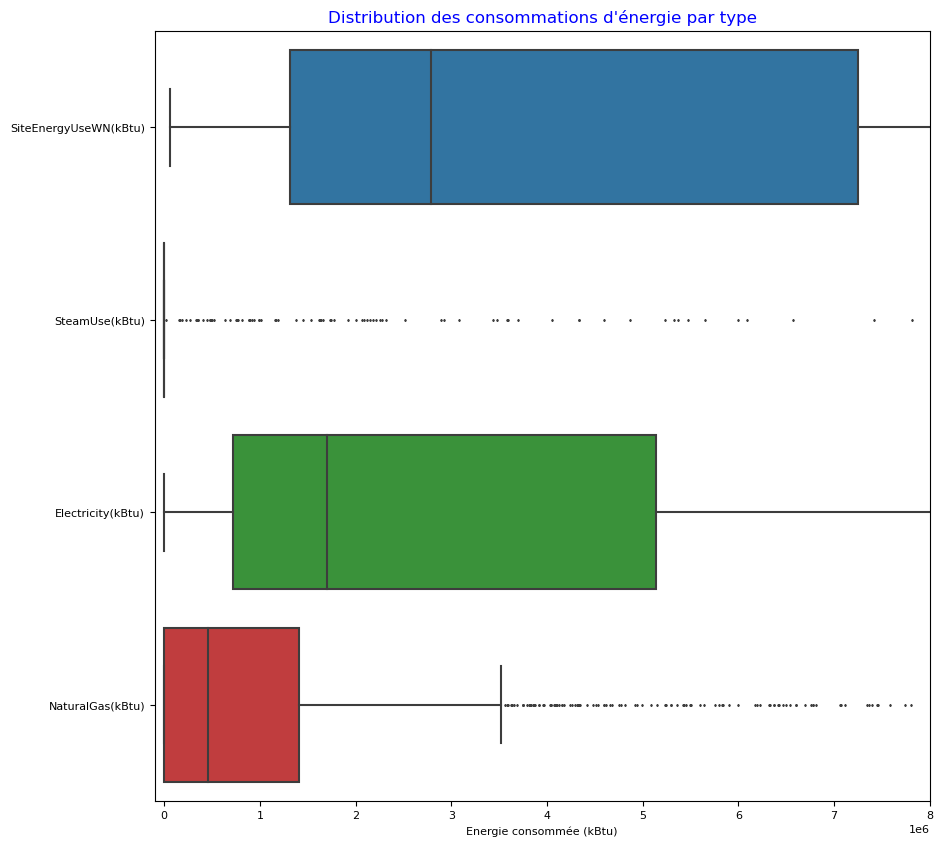

In [648]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlabel='Energie consommée (kBtu)')
sns.boxplot(data=buildings_energy,orient='h',fliersize=1)
plt.title("Distribution des consommations d'énergie par type", fontsize=12, color="blue")
ax.set_xlim(right=8000000, left=-100000)
plt.show()

- L'électricité est la principale source d'énergie utilisée.

- La vapeur est très rarement utilisée.

# <a name="C213">2.1.3 Variable catégorielle - Pie</a>

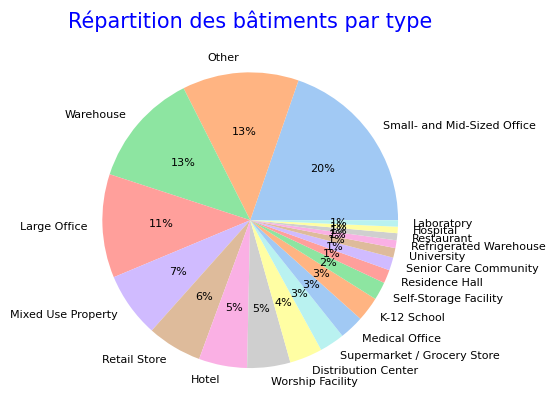

In [649]:
mylabels = ["Small- and Mid-Sized Office", "Other", "Warehouse", "Large Office", "Mixed Use Property", "Retail Store", "Hotel", "Worship Facility", "Distribution Center", "Supermarket / Grocery Store", "Medical Office", "K-12 School", "Self-Storage Facility", "Residence Hall", "Senior Care Community", "University", "Refrigerated Warehouse", "Restaurant", "Hospital","Laboratory"]
buildings.groupby('PrimaryPropertyType').count()['OSEBuildingID'].sort_values(ascending=False)[:20]
y=buildings.groupby('PrimaryPropertyType').count()['OSEBuildingID'].sort_values(ascending=False)[:20]
colors = sns.color_palette('pastel') [0:20]
plt.title('Répartition des bâtiments par type', fontsize=15, color="blue")
plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.rcParams.update({'font.size': 8})
plt.show()

# <a name="C22">2.2: Analyse bivariée - Heatmap de corrélation</a>

Text(0.5, 1.0, 'Heatmap des corrélations')

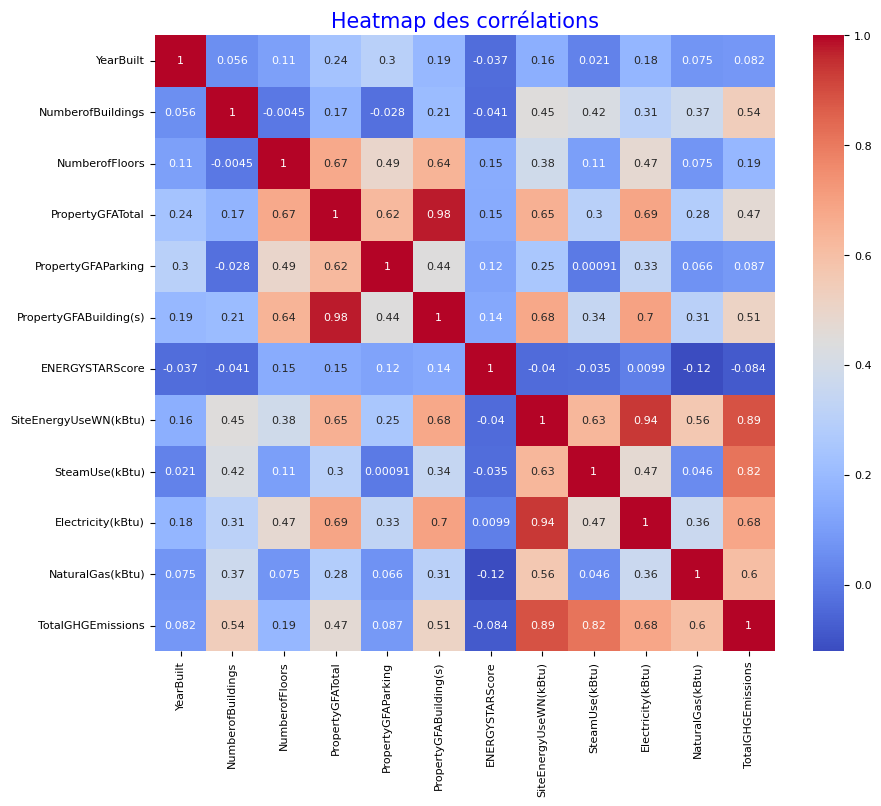

In [650]:
buildings_num=buildings.drop(columns=['OSEBuildingID','PrimaryPropertyType', 'PropertyName', 'Neighborhood'])
corr_matrix = buildings_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap des corrélations', fontsize=15, color='blue')

- Tres forte corrélation entre SiteEnergyUseWNN(kBtu) et Electricity (0.93) => risque de fuite de données

- Forte Corrélation entre SiteEnergyUseWNN(kBtu) et NaturalGas (0.56) et SteamUse (0.63) 

- Tres forte corrélation entre TotalGHGEmissions et SteamUse: 0.82 => risque de fuite de données

=> Nécessité de transformer les variables trop corrélées aux targets pour éviter la fuite de données, dans la partie suivante: features engineering

# <a name="C3">Partie 3: Features engineering</a>

Objectifs du feature engineering:

- Rendre les données compatibles aux modèles (valeurs numériques)

- Faciliter l’apprentissage

- Améliorer les performances (en diminuant la complexité des modèles)



In [651]:
buildings=pd.read_csv('buildings_after_cleaning.csv')

# <a name="C31">3.1 Transformation des variables catégorielles</a>

**1 - PrimaryPropertyType**

In [652]:
buildings['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    280
Other                          181
Warehouse                      178
Large Office                   161
Mixed Use Property             101
Retail Store                    85
Hotel                           75
Worship Facility                67
Distribution Center             51
Supermarket / Grocery Store     39
Medical Office                  38
K-12 School                     38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      15
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Name: PrimaryPropertyType, dtype: int64

**Regroupement de catégories:**
    
    - 'Retail Store' et 'Distribution Center' et 'Supermarket / Grocery Store'
    
    - 'K-12 School' et 'University'
    
    - 'Small- and Mid-Sized Office' et 'Large Office' 

In [653]:
buildings.loc[buildings['PrimaryPropertyType']=='Retail Store','PrimaryPropertyType']='Supermarket / Grocery Store'
buildings.loc[buildings['PrimaryPropertyType']=='Distribution Center','PrimaryPropertyType']='Supermarket / Grocery Store'
buildings.loc[buildings['PrimaryPropertyType']=='Small- and Mid-Sized Office','PrimaryPropertyType']='Large Office'
buildings.loc[buildings['PrimaryPropertyType']=='University','PrimaryPropertyType']='K-12 School'

In [654]:
buildings['PrimaryPropertyType'].value_counts()

Large Office                   441
Other                          181
Warehouse                      178
Supermarket / Grocery Store    175
Mixed Use Property             101
Hotel                           75
Worship Facility                67
K-12 School                     53
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Name: PrimaryPropertyType, dtype: int64

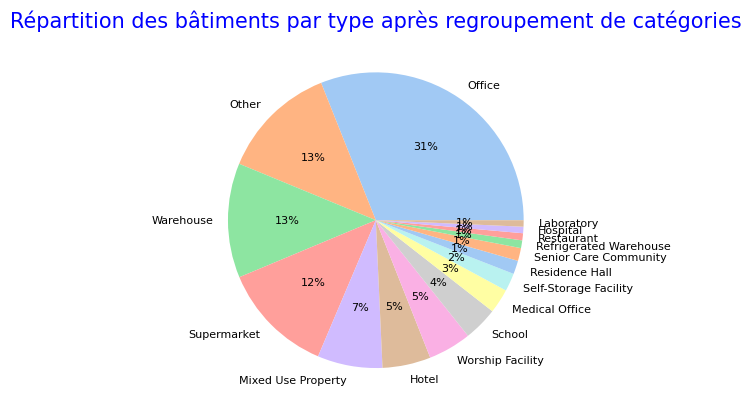

In [655]:
mylabels = ["Office", "Other", "Warehouse", "Supermarket", "Mixed Use Property", "Hotel", "Worship Facility", "School", "Medical Office", "Self-Storage Facility", "Residence Hall", "Senior Care Community", "Refrigerated Warehouse", "Restaurant", "Hospital","Laboratory"]
buildings.groupby('PrimaryPropertyType').count()['OSEBuildingID'].sort_values(ascending=False)[:16]
y=buildings.groupby('PrimaryPropertyType').count()['OSEBuildingID'].sort_values(ascending=False)[:16]
colors = sns.color_palette('pastel') [0:16]
plt.title('Répartition des bâtiments par type après regroupement de catégories', fontsize=15, color="blue")
plt.pie(y, labels = mylabels, colors = colors, autopct='%.0f%%')
plt.rcParams.update({'font.size': 8})
plt.show()

**Encodage OneHot: création d'une nouvelle variable booléenne par valeur de la variable catégorique originale**

In [656]:
from sklearn.preprocessing import OneHotEncoder

# Créer une instance de OneHotEncoder
encoder = OneHotEncoder()

# Encoder la colonne "PrimaryPropertyType" du dataframe "buildings"
buildings_encoded = encoder.fit_transform(buildings[["PrimaryPropertyType"]])

# Ajouter les colonnes encodées au dataframe "buildings"
buildings = pd.concat([buildings, pd.DataFrame(buildings_encoded.toarray(), columns=encoder.get_feature_names_out(["PrimaryPropertyType"]))], axis=1)

**2 - Neighborhood**

In [657]:
buildings['Neighborhood'].value_counts()

DOWNTOWN                 328
GREATER DUWAMISH         306
LAKE UNION               139
MAGNOLIA / QUEEN ANNE    123
EAST                     110
NORTHEAST                109
NORTHWEST                 66
BALLARD                   52
NORTH                     43
CENTRAL                   35
SOUTHWEST                 31
DELRIDGE                  30
SOUTHEAST                 26
North                      8
Delridge                   4
Ballard                    4
Central                    4
Northwest                  3
Name: Neighborhood, dtype: int64

**Regroupement de modalités de la variable catégorielle Neighborhood:** certaines sont des doublons (Delridge, Ballard, Northwest, Central)

Regroupons-les en gardant les modalités en majuscule uniquement

In [658]:
buildings.loc[buildings['Neighborhood']=='North','Neighborhood']='NORTH'
buildings.loc[buildings['Neighborhood']=='Delridge','Neighborhood']='DELRIDGE'
buildings.loc[buildings['Neighborhood']=='Ballard','Neighborhood']='BALLARD'
buildings.loc[buildings['Neighborhood']=='Northwest','Neighborhood']='NORTHWEST'
buildings.loc[buildings['Neighborhood']=='Central','Neighborhood']='CENTRAL'

In [659]:
buildings['Neighborhood'].value_counts()

DOWNTOWN                 328
GREATER DUWAMISH         306
LAKE UNION               139
MAGNOLIA / QUEEN ANNE    123
EAST                     110
NORTHEAST                109
NORTHWEST                 69
BALLARD                   56
NORTH                     51
CENTRAL                   39
DELRIDGE                  34
SOUTHWEST                 31
SOUTHEAST                 26
Name: Neighborhood, dtype: int64

**Encodage OneHot**

In [660]:
# Créer une instance de OneHotEncoder
encoder = OneHotEncoder()

# Encoder la colonne "PrimaryPropertyType" du dataframe "buildings"
buildings_encoded = encoder.fit_transform(buildings[["Neighborhood"]])

# Ajouter les colonnes encodées au dataframe "buildings"
buildings = pd.concat([buildings, pd.DataFrame(buildings_encoded.toarray(), columns=encoder.get_feature_names_out(["Neighborhood"]))], axis=1)

# <a name="C32">3.2 Transformation de variables quantitatives en intervalles</a>

Créons des catégories à partir de YearBuilt qui est une variable quantitatives (valeurs de 1900 à 2015)
- 1900-1909
- 1910-1919
- ...
- 2010-2019


In [661]:
# Définition des limites des intervalles
bins = [1899, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# Définition des étiquettes des intervalles
labels = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

# Conversion de la variable YearBuit en intervalle
buildings['YearBuilt'] = pd.cut(buildings['YearBuilt'], bins=bins, labels=labels)

# <a name="C33">3.3 Transformation des variables quantitatives continues en binaires</a>

Les valeurs des consommations d'électricité, de gaz et de vapeur sont trop corrélées à nos 2 targets.

De plus, nous devrons nous passez des relevés pour prédire les consommations futures. 

Transformons donc ces variables quantitatives continues en variables binaires.

**1 - Transformation de Electricity**

Pour savoir si un batiment utilise l'electricité ou pas, modifions la variable Electricity(kBtu) en variable binaire

In [662]:
buildings.loc[buildings['Electricity(kBtu)'] > 0,'Electricity(kBtu)']=1
buildings.rename(columns={'Electricity(kBtu)': 'Electricity(bin)'}, inplace=True)

**2 - Transformation de NaturalGas**

In [663]:
buildings.loc[buildings['NaturalGas(kBtu)'] > 0,'NaturalGas(kBtu)']=1
buildings.rename(columns={'NaturalGas(kBtu)': 'NaturalGas(bin)'}, inplace=True)

**3 - Transformation de Steam**

In [664]:
buildings.loc[buildings['SteamUse(kBtu)'] > 0,'SteamUse(kBtu)']=1
buildings.rename(columns={'SteamUse(kBtu)': 'SteamUse(bin)'}, inplace=True)

# <a name="C34">3.4 Transformation des variables quantitatives en un ratio</a>

Les variables PropertyGFATotal	et PropertyGFAParking sont très corrélées.

Afin d'améliorer les performances de nos modèles, transformons ces 2 variables en un ratio ParkingToTotalGFARatio 

In [665]:
ParkingToTotalGFARatio=buildings['PropertyGFAParking']/buildings['PropertyGFATotal']

# Ajout de la colonne 'ParkingToTotalGFARatio'
buildings['ParkingToTotalGFARatio']=ParkingToTotalGFARatio

# Suppression des colonnes PropertyGFATotal	et PropertyGFAParking
buildings=buildings.drop(columns=['PropertyGFATotal', 'PropertyGFAParking'])

# <a name="C35">3.5 Passage au log</a>

Objectifs du passage au log:

- Réduire l’amplitude d’une variable sans perte d’information

- Réduire l’influence des valeurs atypiques

Application sur les 2 targets et PropertyGFABuilding(s)


In [666]:
buildings['SiteEnergyUseWN(kBtu)'] = np.log(buildings['SiteEnergyUseWN(kBtu)'] +1)
buildings['SiteEnergyUseWN(kBtu)'].describe()

count    1421.000000
mean       14.964642
std         1.280282
min        10.970183
25%        14.085719
50%        14.841516
75%        15.796613
max        19.508137
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [667]:
buildings['TotalGHGEmissions'] = np.log(buildings['TotalGHGEmissions'] +1)
buildings['TotalGHGEmissions'].describe()

count    1421.000000
mean        3.974639
std         1.430768
min         0.336472
25%         3.033510
50%         3.901973
75%         4.908086
max         9.418018
Name: TotalGHGEmissions, dtype: float64

In [668]:
buildings['PropertyGFABuilding(s)'] = np.log(buildings['PropertyGFABuilding(s)'] +1)
buildings['PropertyGFABuilding(s)'].describe()

count    1421.000000
mean       10.952048
std         0.894336
min         8.198914
25%        10.250511
50%        10.735548
75%        11.451082
max        14.384211
Name: PropertyGFABuilding(s), dtype: float64

**Export des données avant la modélisation**

In [669]:
buildings.to_csv('buildings_before_modelisation.csv', index=False)